Streaming output truncated to the last 5000 lines.
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15114
15115
15116
15117
15118
15119
15120
15121
15122
15123
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
15147
15148
15149
15150
15151
15152
15153
15154
15155
15156
15157
1

Text(0.5, 0, 'Number of antennas M')

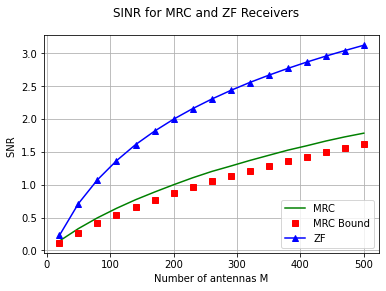

In [ ]:
import numpy as np
import numpy.random as nr
import numpy.linalg as nl
import matplotlib.pyplot as plt
import MIMO

ITER = 20000; # number of iterations
K = 10; # number of users
Mv = np.arange(20,520,30); # number of BS antennas
Eu_dB = 10; # user energy in dB
Eu = 10**(Eu_dB/10);  # energy in linear scale
rate_MRC = np.zeros(len(Mv)) ;  # rate of MRC
bound_MRC = np.zeros(len(Mv));  # bound of MRC
rate_ZF = np.zeros(len(Mv));  # rate of ZF receiver

beta = MIMO.Dmatrix(K);  # large scale fading coefficients
sqrtD = np.diag(np.sqrt(beta)); # diagonal matrix

for it in range(ITER):
  print(it);
  for mx in range(len(Mv)): # run a loop over number of antennas at base station
    M = Mv[mx]; # number of antennas
    pu = Eu;  # no power scaling
    #pu = Eu/M;
    # Generate M,K channel matrix complex gaussian with mean 0 and var 1
    H = (nr.normal(0.0,1.0,(M,K)) + 1j*nr.normal(0.0,1.0,(M,K)))/np.sqrt(2);
    G = np.matmul(H,sqrtD); # massive MIMO Channel matrix M*K
    g0 = G[:,0]; # column of user 0
    MRCbf = g0/nl.norm(g0); # beamformer for maximum ratio combiner
    nr_MRC = pu*nl.norm(g0)**2; # numerator for MR combiner
    nr_bound_MRC = pu*M*beta[0];  # numerator for bound
    dr_bound_MRC = 1;
    mu_int = np.matmul(MIMO.H(MRCbf),G[:,1:]);  #multi user interference taken from 1: because 0th user is intended user
    dr_MRC = 1 + pu*nl.norm(mu_int)**2; # power of MU interference
    dr_bound_MRC = dr_bound_MRC + pu*np.sum(beta[1:]);
    rate_MRC[mx] = rate_MRC[mx] + np.log2(1+nr_MRC/dr_MRC);
    # Lower bound for MRC
    bound_MRC[mx] = bound_MRC[mx] + np.log2(1 + nr_bound_MRC/dr_bound_MRC); # calculate and add the Capacity

    GG = np.matmul(MIMO.H(G),G);  # Line 40 to 44 we are calculating zero forcing
    nr_ZF = pu;
    invGG = nl.inv(GG);
    dr_ZF = np.real(invGG[0,0]);  # rate for user 1 so select 0,0 entry
    rate_ZF[mx] = rate_ZF[mx] + np.log2(1+nr_ZF/dr_ZF); # capacity for zero forcing

rate_MRC = rate_MRC/ITER; # averaging over ITER
bound_MRC = bound_MRC/ITER;
rate_ZF = rate_ZF/ITER;

plt.plot(Mv, rate_MRC,'g-');
plt.plot(Mv, bound_MRC,'rs');
plt.plot(Mv, rate_ZF,'b^-');
plt.grid(1,which='both')
plt.legend(["MRC", "MRC Bound", "ZF"], loc ="lower right");
plt.suptitle('Rate for MRC and ZF Receivers')
plt.ylabel('Rate ')
plt.xlabel('Number of antennas M')

Streaming output truncated to the last 5000 lines.
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15114
15115
15116
15117
15118
15119
15120
15121
15122
15123
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
15147
15148
15149
15150
15151
15152
15153
15154
15155
15156
15157
1

Text(0.5, 0, 'Number of antennas M')

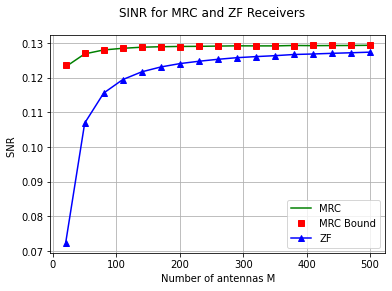

In [ ]:
import numpy as np
import numpy.random as nr
import numpy.linalg as nl
import matplotlib.pyplot as plt
import MIMO

ITER = 20000; # number of iterations
K = 10; # number of users
Mv = np.arange(20,520,30); # number of BS antennas
Eu_dB = 10; # user energy in dB
Eu = 10**(Eu_dB/10);  # energy in linear scale
rate_MRC = np.zeros(len(Mv)) ;  # rate of MRC
bound_MRC = np.zeros(len(Mv));  # bound of MRC
rate_ZF = np.zeros(len(Mv));  # rate of ZF receiver

beta = MIMO.Dmatrix(K);  #
sqrtD = np.diag(np.sqrt(beta));

for it in range(ITER):
  print(it);
  for mx in range(len(Mv)):
    M = Mv[mx];
    #pu = Eu;  # no power scaling
    pu = Eu/M;
    H = (nr.normal(0.0,1.0,(M,K)) + 1j*nr.normal(0.0,1.0,(M,K)))/np.sqrt(2);
    G = np.matmul(H,sqrtD);
    g0 = G[:,0]; # column of user 0
    MRCbf = g0/nl.norm(g0); # beamformer for maximum ratio combiner
    nr_MRC = pu*nl.norm(g0)**2;
    nr_bound_MRC = pu*M*beta[0];
    dr_bound_MRC = 1;
    mu_int = np.matmul(MIMO.H(MRCbf),G[:,1:]);
    dr_MRC = 1 + pu*nl.norm(mu_int)**2;
    dr_bound_MRC = dr_bound_MRC + pu*np.sum(beta[1:]);
    rate_MRC[mx] = rate_MRC[mx] + np.log2(1+nr_MRC/dr_MRC);
    bound_MRC[mx] = bound_MRC[mx] + np.log2(1 + nr_bound_MRC/dr_bound_MRC);

    GG = np.matmul(MIMO.H(G),G);
    nr_ZF = pu;
    invGG = nl.inv(GG);
    dr_ZF = np.real(invGG[0,0]);
    rate_ZF[mx] = rate_ZF[mx] + np.log2(1+nr_ZF/dr_ZF);

rate_MRC = rate_MRC/ITER;
bound_MRC = bound_MRC/ITER;
rate_ZF = rate_ZF/ITER;

plt.plot(Mv, rate_MRC,'g-');
plt.plot(Mv, bound_MRC,'rs');
plt.plot(Mv, rate_ZF,'b^-');
plt.grid(1,which='both')
plt.legend(["MRC", "MRC Bound", "ZF"], loc ="lower right");
plt.suptitle('SINR for MRC and ZF Receivers')
plt.ylabel('SNR ')
plt.xlabel('Number of antennas M')